![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Exercise 01 - Python 101 - Solution </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/Exercises/Exercise01_Python101_Solution.ipynb)

### Q1 - Fibonacci sequence
The Fibonacci sequence $\left\{ a_{n}\right\} _{n=0}^{\infty}$ is defined by:
$$a_{n}=\begin{cases}
0 & n=0\\
1 & n=1\\
a_{n-1}+a_{n-2} & n\geq2
\end{cases}$$
The first few elements are:
$$0,1,1,2,3,5,8,13,21,\dots$$


Implement the function `Fibonacci(n)` that computes the $n$th Fibonacci number.  
Options:
1. Use a `for` loop.
2. Use recursion.
3. **(Extra)** using a closed form expression.

In [1]:
def Fibonacci(n):
    if n <= 1:
        return n
    
    n0 = 0
    n1 = 1
    for ii in range(n - 1):
        n1, n0 = n0 + n1, n1
        
    return n1

In [2]:
def Fibonacci(n):
    if n <= 1:
        return n
    
    return Fibonacci(n-1) + Fibonacci(n-2)

In [3]:
print('Fibonacci sequence:')
[Fibonacci(ii) for ii in range(15)]

Fibonacci sequence:


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

### Q2 - Sorting
Implement the sort function `Sort(arr)` .  
Options (choose one):
* Bubble sort
* Merge sort
* Quick sort

**Extra:** Add a boolean flag for an in-place operation.

In [4]:
def Sort(arr, bInplace=False):
    if bInplace == False:
        arr = arr.copy()
    N = len(arr)
    for ii in range(N):
        for jj in range(N-ii-1):
            if arr[jj] > arr[jj+1]:
                arr[jj], arr[jj+1] = arr[jj+1], arr[jj]
    return arr

In [5]:
import numpy as np

arr  = np.random.randint(0, 100, 15)
arr2 = Sort(arr)

print(f'before: {arr }')
print(f'after : {arr2}')

before: [82 10  3 47 19 73 94 67 50 54 86 63 81 43 87]
after : [ 3 10 19 43 47 50 54 63 67 73 81 82 86 87 94]


### Q3 - Monte Carlo
Estimate $\pi$ using the following steps:
1. set `count = 0`
2. For ii = 1,2,3,...,N:  
    2.1 draw a point $\boldsymbol{x}\sim U\left[0,1\right]^{2}$.  
    2.2 if $\left\Vert \boldsymbol{x}\right\Vert _{2}\leq1$:  
    * `count` $\leftarrow$  `count+1`
3. set $\hat{\pi}=4\frac{\text{count}}{N}$

**Extra:**
Repeat the exercise without using loops.

In [6]:
def EstimatePi(N):
    count = 0
    for ii in range(N):
        x = np.random.rand(2)
        if np.linalg.norm(x) <= 1:
            count += 1
    return 4 * count / N

In [7]:
def EstimatePi(N):
    return 4 * ((np.random.rand(2, N)**2).sum(0) <= 1).mean()

In [8]:
print(f'Monte Carlo estimation: {EstimatePi(100000)}')
print(f'                    ℼ = {np.pi}')

Monte Carlo estimation: 3.1292
                    ℼ = 3.141592653589793


### Q4 - Rotation
Consider the following smiley
#### Generate data:

In [9]:
import matplotlib.pyplot as plt

R    = 1
r    = .7
ℼ    = np.pi
θ    = np.linspace(0,    2*ℼ, 100, endpoint=False)
φ    = np.linspace(-ℼ/4, ℼ/4, 20,  endpoint=False) - ℼ/2
ball = np.random.randn(30, 2) / 20

face   = np.c_[R*np.cos(θ), R*np.sin(θ)]
mouth  = np.c_[r*np.cos(φ), r*np.sin(φ)]
eye1   = ball + [0.4, 0.5]
eye2   = eye1 * [-1,  1]
smiley = np.concatenate([face, mouth, eye1, eye2]).T
smiley.shape

(2, 180)

#### Plot data:

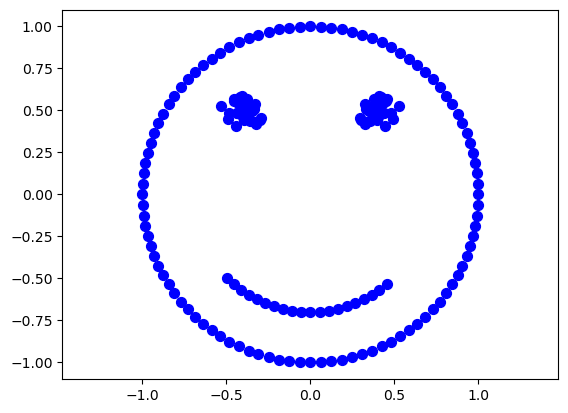

In [10]:
plt.scatter(smiley[0,:], smiley[1,:], s=50, c='b')
plt.axis('equal')
plt.show()

The data is stored in the matrix `smiley` with shape `smiley.shape = (2, 180)`    
In other words $\mathrm{smiley}\in\mathbb{R}^{2\times180}$.  
Each column in `smiley` is a 2D vector.

Your task is to rotate the smiley figure in $\theta=30^{\circ}$.  
**Hint**: A $2\times 2$ rotation matrix has the following form:
$$\boldsymbol{R}=\left[\begin{matrix}\cos\left(\theta\right) & -\sin\left(\theta\right)\\
\sin\left(\theta\right) & \cos\left(\theta\right)
\end{matrix}\right]$$

**Extra:**
* Add an interactive slider for `θ`.
* Add a nose.

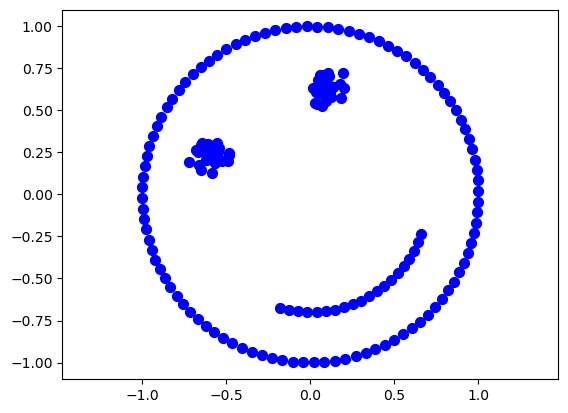

In [11]:
def PlotRotate(θ):
    R = np.array([[np.cos(θ), -np.sin(θ)],
                  [np.sin(θ),  np.cos(θ)]])
    
    X = R @ smiley
    plt.scatter(X[0,:], X[1,:], s=50, c='b')
    plt.axis('equal')
    
PlotRotate(ℼ/6)
plt.show()

In [12]:
from ipywidgets import interact, FloatSlider, Layout

interact(PlotRotate, θ=FloatSlider(min=0, max=2*ℼ, step=ℼ/10, value=0, layout=Layout(width='80%')))
plt.show()

interactive(children=(FloatSlider(value=0.0, description='θ', layout=Layout(width='80%'), max=6.28318530717958…

### Q5 - Plots
Create a figure with the following curves:
1. $f\left(x\right)=\frac{1}{4}x^{2}$
2. $f\left(x\right)=\max\left\{ 0,x\right\} $
3. $f\left(x\right)=\sin\left(x\right)$
4. $x^{2}+y^{2}=1$

* Add labels to the axes.
* Add a legend.
* Add a title.

**Extra:** Make each curve in a sub-plot.

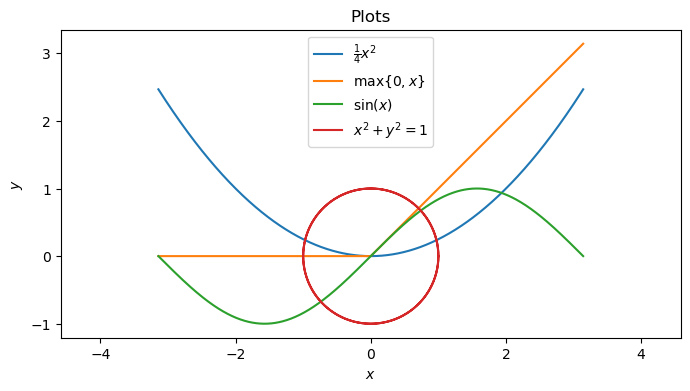

In [13]:
x = np.linspace(-ℼ, ℼ, 1001)
plt.figure(figsize=(8, 4))
plt.plot(x,           x**2 / 4,         label='$\\frac{1}{4}x^2$')
plt.plot(x,           np.maximum(0, x), label='$\max\{0, x\}   $')
plt.plot(x,           np.sin(x),        label='$\sin(x)        $')
plt.plot(np.cos(2*x), np.sin(2*x),      label='$x^2 + y^2 = 1  $')
plt.axis('equal')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Plots')
plt.show()

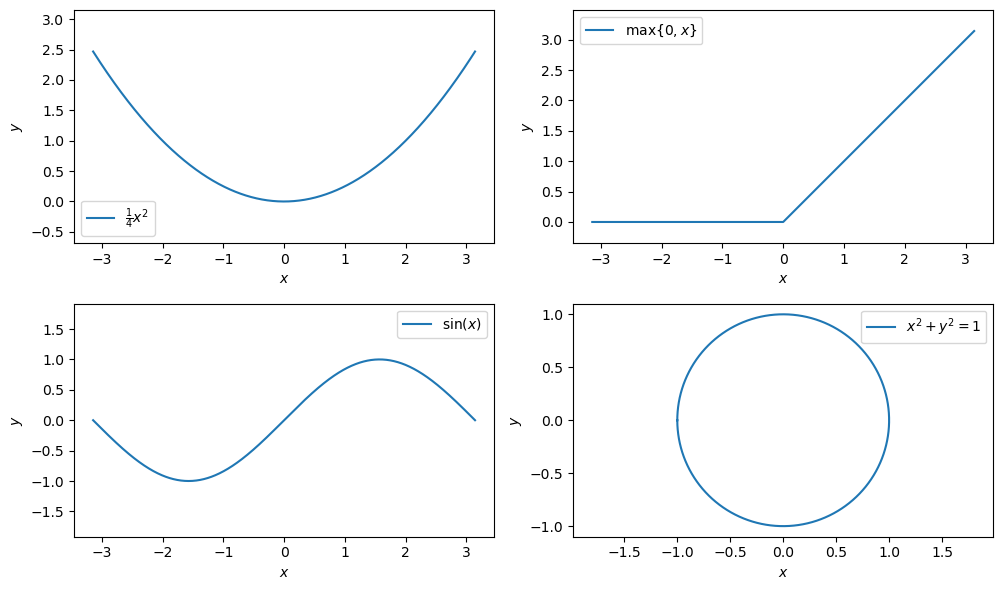

In [14]:
x = np.linspace(-ℼ, ℼ, 1001)

lC  = [(x        , x**2 / 4        , '$\\frac{1}{4}x^2$')]
lC += [(x        , np.maximum(0, x), '$\max\{0, x\}   $')]
lC += [(x        , np.sin(x)       , '$\sin(x)        $')]
lC += [(np.cos(x), np.sin(x)       , '$x^2 + y^2 = 1  $')]

fig, _ = plt.subplots(2, 2, figsize=(10, 6))
for ax, (x, y, label) in zip(fig.axes, lC):
    ax.plot(x, y, label=label)
    ax.legend()
    ax.axis('equal')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

plt.tight_layout()
plt.show()
